# Weird Motors Pricing Calculator

This project uses Linear regression to predict the price of cars based on their features.

In [247]:
#Python import Pandas to be the container of all data. Import Seaborn for graphical data analysis.
import pandas as pd
import seaborn as sns
#Set the theme for Seaborn graphics
sns.set_theme()

In [248]:
#Read in CSV file into cars DataFrame show the first 5 rows of cars to see what we are working with.
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [249]:
#Remove Car_ID and check cars for any duplicate rows.
cars = cars.drop(['car_ID'], axis=1)
cars.duplicated().sum()

0

In [250]:
#Remove CarName and see list of features
cars = cars.drop(['CarName'], axis=1)
cars.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [251]:
#Split the Features into strings and numbers and remove price
carFeatureListObj = list(cars.select_dtypes(include='object').columns)
carFeatureListNum = list(cars.select_dtypes(include='number').columns)
carFeatureListNum.remove('price')

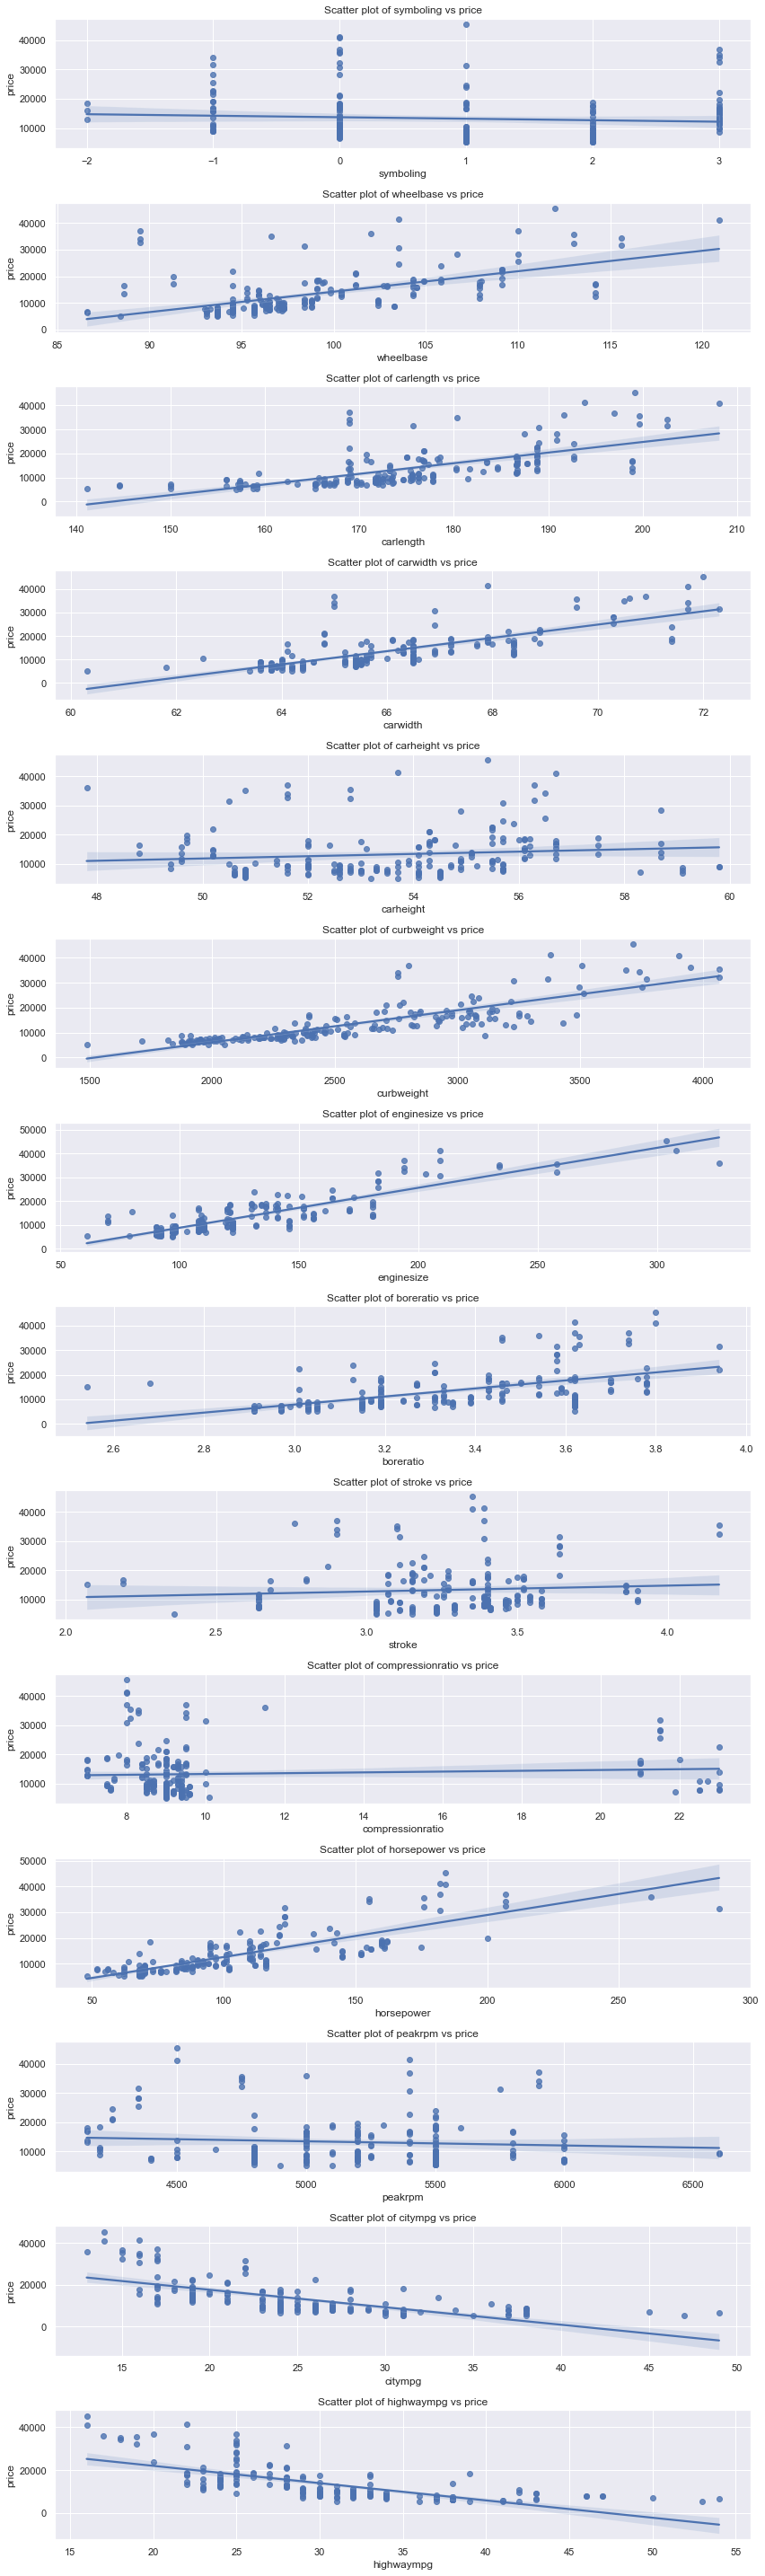

In [252]:
#A for loop to create graphs based on the number type features
fig,ax=plt.subplots(nrows=len(carFeatureListNum),ncols=1,figsize=(12,40))
count=0
for i in carFeatureListNum:
    sns.regplot(x=cars[i],y=cars["price"],ax=ax[count])
    ax[count].set_title("Scatter plot of "+str(i)+" vs price")
    count+=1
plt.tight_layout()

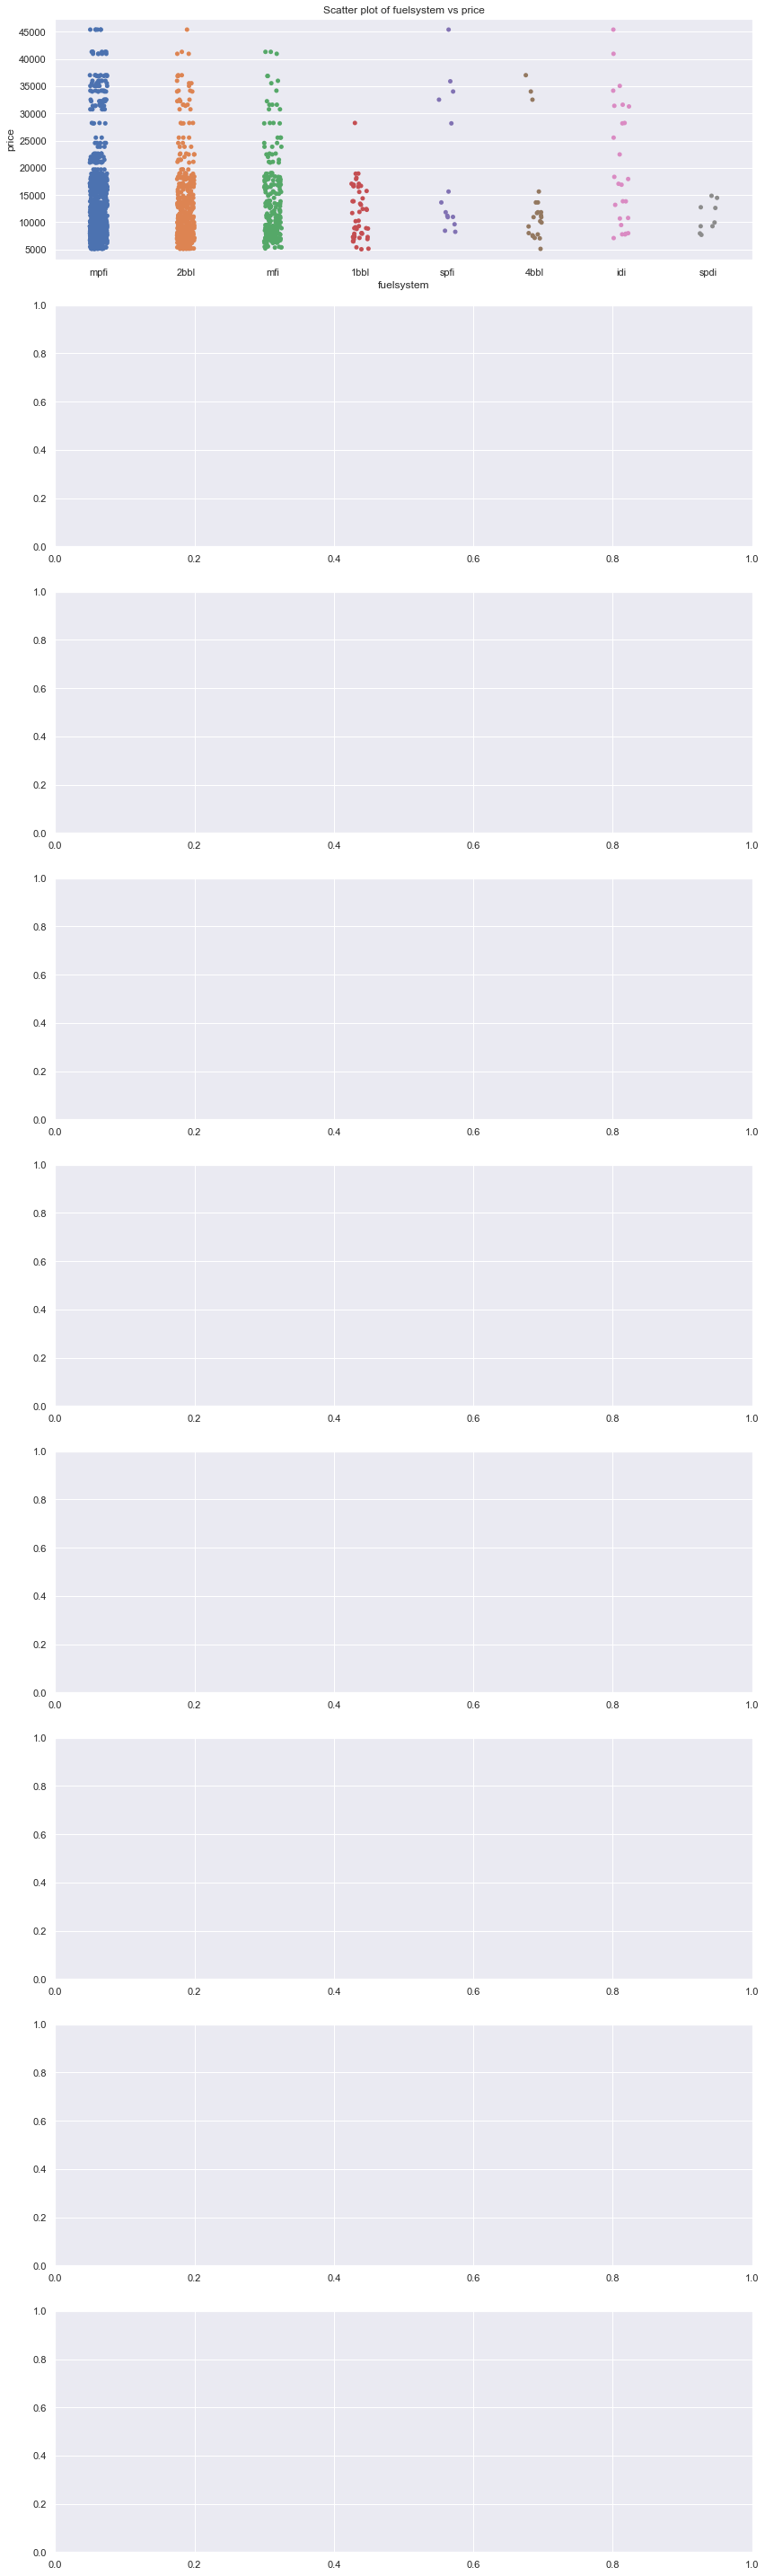

In [253]:
#A for loop to create graphs based on the string type features
fig,ax=plt.subplots(nrows=len(carFeatureListObj),ncols=1,figsize=(12,40))
count=0
for i in carFeatureListObj:
    sns.stripplot(x=cars[i],y=cars["price"],ax=ax[count])
    ax[count].set_title("Scatter plot of "+str(i)+" vs price")
    m+=1
plt.tight_layout()

<AxesSubplot:>

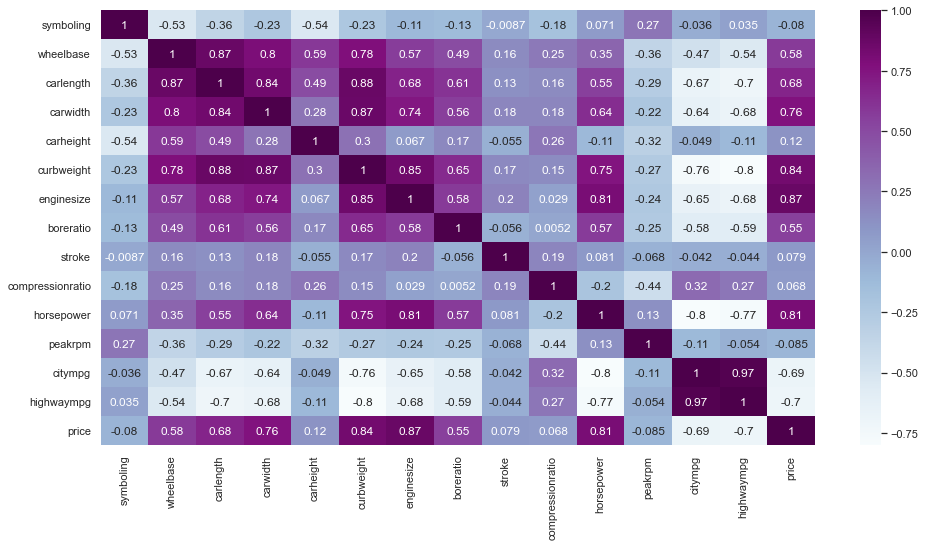

In [254]:
#Show a heatmap of the coorolation between all features including price
plt.figure(figsize=(16,8))
sns.heatmap(cars.corr(), annot=True, cmap='BuPu')

In [263]:
#Transform all of the string feature columns into seperate columns based on strings
carsDummied = pd.get_dummies(cars, columns=carFeatureListObj, drop_first=True)
carsDummied.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [264]:
#Import train_test_split to create testing data and training data
from sklearn.model_selection import train_test_split

#split data into independant and depaendant variables.
X = carsDummied.drop('price', axis=1)
Y = carsDummied['price']

#Create training/testing data and show the sizes of the split data
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size = 0.05, random_state = 42)
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((194, 43), (11, 43), (194,), (11,))

In [265]:
#Import the linear regression model api
from sklearn.linear_model import LinearRegression

#Create a linear regression model and see the score (0-1) 1 being the best
lr = LinearRegression()
lr.fit(xTrain, yTrain)
lr.score(xTest, yTest)

0.9324170824278943

In [268]:
#Use the model to predict the 11 test data entries to see how well it did.
yPredicted = lr.predict(xTest)
d = {'Predicted':list(yPredicted), 'Actual':list(y_test)}
df = pd.DataFrame(data=d)
df["Percentage"] = abs(df['Predicted']-df['Actual'])/df['Actual']*100
df

,Predicted,Actual,Percentage
0,30835.222774,30760.000,0.244547
1,21811.614932,17859.167,22.131200
2,11040.826615,9549.000,15.622857
3,12774.178058,11850.000,7.798971
4,27055.455819,28248.000,4.221694
5,5773.188706,7799.000,25.975270
6,8862.450134,7788.000,13.796227
7,7709.854333,9258.000,16.722247
8,9105.738035,10198.000,10.710551
9,9729.162211,7775.000,25.133919


In [269]:
import ipywidgets as widgets